In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

In [4]:
# the following line imports my spreadsheet that was saved in .csv format

df = pd.read_csv('mytable_customer_details.csv')

# convert dataframes to csv
# df.to_csv(“filename.csv")

In [5]:
df.head()

,customer_id,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,payment_type,monthly_charges,total_charges,churn,tenure,is_female,has_churned,has_phone,has_internet,has_phone_and_internet,partner_dependents,start_date,average_monthly_charges,validate_monthly_charges,contract_type_desc,phone_type_desc,internet_type_desc
0,1371-DWPAZ,Female,0,Yes,Yes,0,1,2,Credit card (automatic),$56.05,NaN,No,0,True,False,False,True,False,3,20210727,$0.00,False,2 Year,No Phone Service,DSL
1,2520-SGTTA,Female,0,Yes,Yes,1,0,2,Mailed check,$20.00,NaN,No,0,True,False,True,False,False,3,20210727,$0.00,False,2 Year,One Line,No Internet Service
2,2775-SEFEE,Male,0,No,Yes,2,1,2,Bank transfer (automatic),$61.90,NaN,No,0,False,False,True,True,True,2,20210727,$0.00,False,2 Year,Two or More Lines,DSL
3,2923-ARZLG,Male,0,Yes,Yes,1,0,1,Mailed check,$19.70,NaN,No,0,False,False,True,False,False,3,20210727,$0.00,False,1 Year,One Line,No Internet Service
4,3115-CZMZD,Male,0,No,Yes,1,0,2,Mailed check,$20.25,NaN,No,0,False,False,True,False,False,2,20210727,$0.00,False,2 Year,One Line,No Internet Service


In [6]:
df.columns

Index(['customer_id', 'gender', 'is_senior_citizen', 'partner', 'dependents',
       'phone_service', 'internet_service', 'contract_type', 'payment_type',
       'monthly_charges', 'total_charges', 'churn', 'tenure', 'is_female',
       'has_churned', 'has_phone', 'has_internet', 'has_phone_and_internet',
       'partner_dependents', 'start_date', 'average_monthly_charges',
       'validate_monthly_charges', 'contract_type_desc', 'phone_type_desc',
       'internet_type_desc'],
      dtype='object')

In [7]:
df.describe()

,is_senior_citizen,phone_service,internet_service,contract_type,tenure,partner_dependents,start_date
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7.043000e+03
mean,0.162147,1.325004,1.222916,0.690473,32.368309,1.082209,2.018443e+07
std,0.368612,0.642730,0.778877,0.833755,24.597021,1.226274,2.089130e+04
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.014122e+07
25%,0.000000,1.000000,1.000000,0.000000,9.000000,0.000000,2.016122e+07
50%,0.000000,1.000000,1.000000,0.000000,29.000000,1.000000,2.019031e+07
75%,0.000000,2.000000,2.000000,1.000000,55.000000,2.000000,2.020110e+07
max,1.000000,2.000000,2.000000,2.000000,79.000000,3.000000,2.021073e+07


In [8]:
df.dtypes

customer_id                 object
gender                      object
is_senior_citizen            int64
partner                     object
dependents                  object
phone_service                int64
internet_service             int64
contract_type                int64
payment_type                object
monthly_charges             object
total_charges               object
churn                       object
tenure                       int64
is_female                     bool
has_churned                   bool
has_phone                     bool
has_internet                  bool
has_phone_and_internet        bool
partner_dependents           int64
start_date                   int64
average_monthly_charges     object
validate_monthly_charges      bool
contract_type_desc          object
phone_type_desc             object
internet_type_desc          object
dtype: object

In [9]:
# the following lines remvove $ signs and convert money from string to float

df.average_monthly_charges = df.average_monthly_charges.str.replace('$', '').astype(float)
df.monthly_charges = df.monthly_charges.str.replace('$','').astype(float)
df.total_charges = df.total_charges.str.replace('$','')
df.total_charges = df.total_charges.str.replace(',','').astype(float)

df.dtypes

<ipython-input-9-4d46c9400e92>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df.average_monthly_charges = df.average_monthly_charges.str.replace('$', '').astype(float)
<ipython-input-9-4d46c9400e92>:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df.monthly_charges = df.monthly_charges.str.replace('$','').astype(float)
<ipython-input-9-4d46c9400e92>:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df.total_charges = df.total_charges.str.replace('$','')


customer_id                  object
gender                       object
is_senior_citizen             int64
partner                      object
dependents                   object
phone_service                 int64
internet_service              int64
contract_type                 int64
payment_type                 object
monthly_charges             float64
total_charges               float64
churn                        object
tenure                        int64
is_female                      bool
has_churned                    bool
has_phone                      bool
has_internet                   bool
has_phone_and_internet         bool
partner_dependents            int64
start_date                    int64
average_monthly_charges     float64
validate_monthly_charges       bool
contract_type_desc           object
phone_type_desc              object
internet_type_desc           object
dtype: object

In [10]:
# the following creates a new boolean column for automatic payments
df['payment_is_automatic'] = df.payment_type.str.replace('(', '')
df['payment_is_automatic'] = df.payment_is_automatic.str.replace(')', '')
df['payment_is_automatic'] = df.payment_is_automatic.str.replace('Credit card automatic', 'True')
df['payment_is_automatic'] = df.payment_is_automatic.str.replace('Bank transfer automatic', 'True')
df['payment_is_automatic'] = df.payment_is_automatic.str.replace('Electronic check', '')
df['payment_is_automatic'] = df.payment_is_automatic.str.replace('Mailed check', '')
df['payment_is_automatic'] = df.payment_is_automatic.astype(bool)
df.head()
# astype(bool) converts any string to True, and only empty strings to false
# thus the values that I wanted to be false were left empty before type change

<ipython-input-10-8412b4f8f72d>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df['payment_is_automatic'] = df.payment_type.str.replace('(', '')
<ipython-input-10-8412b4f8f72d>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df['payment_is_automatic'] = df.payment_is_automatic.str.replace(')', '')


,customer_id,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,payment_type,monthly_charges,total_charges,churn,tenure,is_female,has_churned,has_phone,has_internet,has_phone_and_internet,partner_dependents,start_date,average_monthly_charges,validate_monthly_charges,contract_type_desc,phone_type_desc,internet_type_desc,payment_is_automatic
0,1371-DWPAZ,Female,0,Yes,Yes,0,1,2,Credit card (automatic),56.05,NaN,No,0,True,False,False,True,False,3,20210727,0.0,False,2 Year,No Phone Service,DSL,True
1,2520-SGTTA,Female,0,Yes,Yes,1,0,2,Mailed check,20.00,NaN,No,0,True,False,True,False,False,3,20210727,0.0,False,2 Year,One Line,No Internet Service,False
2,2775-SEFEE,Male,0,No,Yes,2,1,2,Bank transfer (automatic),61.90,NaN,No,0,False,False,True,True,True,2,20210727,0.0,False,2 Year,Two or More Lines,DSL,True
3,2923-ARZLG,Male,0,Yes,Yes,1,0,1,Mailed check,19.70,NaN,No,0,False,False,True,False,False,3,20210727,0.0,False,1 Year,One Line,No Internet Service,False
4,3115-CZMZD,Male,0,No,Yes,1,0,2,Mailed check,20.25,NaN,No,0,False,False,True,False,False,2,20210727,0.0,False,2 Year,One Line,No Internet Service,False


In [11]:
# this checks the types of data after cleaning
df.dtypes

customer_id                  object
gender                       object
is_senior_citizen             int64
partner                      object
dependents                   object
phone_service                 int64
internet_service              int64
contract_type                 int64
payment_type                 object
monthly_charges             float64
total_charges               float64
churn                        object
tenure                        int64
is_female                      bool
has_churned                    bool
has_phone                      bool
has_internet                   bool
has_phone_and_internet         bool
partner_dependents            int64
start_date                    int64
average_monthly_charges     float64
validate_monthly_charges       bool
contract_type_desc           object
phone_type_desc              object
internet_type_desc           object
payment_is_automatic           bool
dtype: object

In [12]:
# the following command searches for pairwise correlation of all columns
# in the dataframe

df.corr()

# the highest correlation values are for:
# 'is_senior_citizen': 0.15
# 'start_date': 0.35
# 'internet_service': 0.31
# 'has_internet': 0.22
# 'has_internet_and_phone': 0.20
# 'monthly_charges': 0.19
# 'average_monthly_charges': 0.19

# the following values for phone are provided because they may have some
# relation to internet service
# the phone values do not appear to be important
# the value for total charges also does not appear to be important

# 'phone_service': 0.03
# 'has_phone': 0.01

,is_senior_citizen,phone_service,internet_service,contract_type,monthly_charges,total_charges,tenure,is_female,has_churned,has_phone,has_internet,has_phone_and_internet,partner_dependents,start_date,average_monthly_charges,validate_monthly_charges,payment_is_automatic
is_senior_citizen,1.000000,0.113791,0.259390,-0.142554,0.220173,0.102411,0.016107,0.001874,0.150889,0.008576,0.182742,0.167749,-0.151073,-0.015393,0.220525,0.017399,-0.033520
phone_service,0.113791,1.000000,0.307988,0.083343,0.490700,0.412495,0.258792,0.009451,0.036310,0.675070,0.082560,0.503650,0.033120,-0.255660,0.489895,0.008812,0.086685
internet_service,0.259390,0.307988,1.000000,-0.290189,0.905491,0.428212,0.032938,0.010380,0.316846,0.093720,0.825819,0.793101,-0.134267,-0.031004,0.904461,0.039020,-0.038043
contract_type,-0.142554,0.083343,-0.290189,1.000000,-0.074195,0.450306,0.671321,-0.000126,-0.396713,0.002247,-0.242388,-0.213817,0.301843,-0.669704,-0.077252,-0.057812,0.330452
monthly_charges,0.220173,0.490700,0.905491,-0.074195,1.000000,0.651065,0.247633,0.014569,0.193356,0.247398,0.763557,0.835774,-0.045625,-0.244995,0.998086,0.030685,0.061086
total_charges,0.102411,0.412495,0.428212,0.450306,0.651065,1.000000,0.826241,-0.000048,-0.199484,0.113008,0.374878,0.404842,0.178438,-0.821299,0.651065,NaN,0.306989
tenure,0.016107,0.258792,0.032938,0.671321,0.247633,0.826241,1.000000,-0.004522,-0.351726,0.008398,0.038591,0.039624,0.273160,-0.993588,0.249789,0.052051,0.395947
is_female,0.001874,0.009451,0.010380,-0.000126,0.014569,-0.000048,-0.004522,1.000000,0.008612,0.006488,0.006026,0.009487,-0.007121,0.005331,0.013992,0.003219,0.012362
has_churned,0.150889,0.036310,0.316846,-0.396713,0.193356,-0.199484,-0.351726,0.008612,1.000000,0.011942,0.227890,0.209988,-0.184012,0.351451,0.194125,0.023771,-0.209902
has_phone,0.008576,0.675070,0.093720,0.002247,0.247398,0.113008,0.008398,0.006488,0.011942,1.000000,-0.172209,0.484538,0.005899,-0.007988,0.247759,0.011366,-0.000104


<AxesSubplot:>

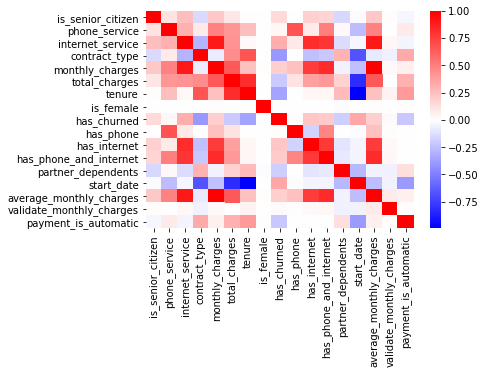

In [15]:
# the following command creates a heatmap of the correlation values found previously

#sns.heatmap(df.corr(), cmap='coolwarm')
# the following color scheme is easier to understand
sns.heatmap(df.corr(), cmap = 'bwr')

In [20]:
# I am checking the contract type because the instructions imply that contract type is important
# Churn is biggest in the month to month clients
t_churn = df.churn.value_counts()
m_t_m_churn = df.churn[(df.contract_type_desc == 'Month-to-Month')].value_counts()
y1_churn = df.churn[(df.contract_type_desc == '1 Year')].value_counts()
y2_churn = df.churn[(df.contract_type_desc == '2 Year')].value_counts()

print('The total churn is:')
print(t_churn)
print('The churn for Month to Month clients:')
print(m_t_m_churn)
print('The churn for 1 Year contract clients:')
print(y1_churn)
print('The churn for 2 year contract clients:')
print(y2_churn)

The total churn is:
No     5174
Yes    1869
Name: churn, dtype: int64
The churn for Month to Month clients:
No     2220
Yes    1655
Name: churn, dtype: int64
The churn for 1 Year contract clients:
No     1307
Yes     166
Name: churn, dtype: int64
The churn for 2 year contract clients:
No     1647
Yes      48
Name: churn, dtype: int64


In [ ]:
# I will internet_service more thoroughly, because it has the second largest
# correlation to churn, and is also closely related to other fields
# that can be easily explored, and that executives have control over

# the start_date has slightly larger correlation, but less relation to other fields for mining

In [20]:
# look at churn rates for the different internet types
total_mfiber = df.customer_id[(df.contract_type_desc == 'Month-to-Month') & (df.internet_type_desc == 'Fiber Optic')]
churn_mfiber = df.customer_id[(df.contract_type_desc == 'Month-to-Month') & (df.internet_type_desc == 'Fiber Optic') & (df.has_churned == True)]

total_mdsl = df.customer_id[(df.contract_type_desc == 'Month-to-Month') & (df.internet_type_desc == 'DSL')]
churn_mdsl = df.customer_id[(df.contract_type_desc == 'Month-to-Month') & (df.internet_type_desc == 'DSL') & (df.has_churned == True)]


total_mnoint = df.customer_id[(df.contract_type_desc == 'Month-to-Month') & (df.internet_type_desc == 'No Internet Service')]
churn_mnoint = df.customer_id[(df.contract_type_desc == 'Month-to-Month') & (df.internet_type_desc == 'No Internet Service') & (df.has_churned == True)]

print('the churn rate for monthly fiber optic is:')
print((churn_mfiber.count() / total_mfiber.count()) * 100)

print('the churn rate for monthly DSL is:')
print((churn_mdsl.count() / total_mdsl.count()) * 100)

print('the churn rate for monthly no-internet is:')
print((churn_mnoint.count() / total_mnoint.count()) * 100)

the churn rate for monthly fiber optic is:
54.60526315789473
the churn rate for monthly DSL is:
32.21586263286999
the churn rate for monthly no-internet is:
18.893129770992367


In [22]:
# the biggest churn by far is in the monthly fiber optic
# total number of monthly fiber customers
total_mfiber = df.customer_id[(df.contract_type_desc == 'Month-to-Month') & (df.internet_type_desc == 'Fiber Optic')]
total_mfiber.count()

2128

In [23]:
# monthly fiber customers with autopay
fiber_auto = df.customer_id[(df.contract_type_desc == 'Month-to-Month') & (df.internet_type_desc == 'Fiber Optic') & (df.payment_is_automatic == True)]
# monthly fiber customers with autopay that churned
fiber_auto_churned = df.customer_id[(df.contract_type_desc == 'Month-to-Month') & (df.internet_type_desc == 'Fiber Optic') & (df.payment_is_automatic == True) & (df.has_churned == True)]
fiber_auto_churnrate = (fiber_auto_churned.count() / fiber_auto.count()) * 100
print('the churn rate for monthly fiber optic with autopay:')
print(fiber_auto_churnrate)

# monthly fiber customers without autopay
fiber_notauto = df.customer_id[(df.contract_type_desc == 'Month-to-Month') & (df.internet_type_desc == 'Fiber Optic') & (df.payment_is_automatic == False)]
# monthly fiber customers without autopay that churned
fiber_notauto_churned = df.customer_id[(df.contract_type_desc == 'Month-to-Month') & (df.internet_type_desc == 'Fiber Optic') & (df.payment_is_automatic == False) & (df.has_churned == True)]
fiber_notauto_churnrate = (fiber_notauto_churned.count() / fiber_notauto.count()) * 100
print('the churn rate for monthly fiber optic without autopay:')
print(fiber_notauto_churnrate)

the churn rate for monthly fiber optic with autopay:
43.70967741935484
the churn rate for monthly fiber optic without autopay:
59.08488063660477


In [24]:
# monthly dsl customers with autopay
dsl_auto = df.customer_id[(df.contract_type_desc == 'Month-to-Month') & (df.internet_type_desc == 'DSL') & (df.payment_is_automatic == True)]
# monthly dsl customers with autopay that churned
dsl_auto_churned = df.customer_id[(df.contract_type_desc == 'Month-to-Month') & (df.internet_type_desc == 'DSL') & (df.payment_is_automatic == True) & (df.has_churned == True)]
dsl_auto_churnrate = (dsl_auto_churned.count() / dsl_auto.count()) * 100
print('the churn rate for monthly DSL with autopay:')
print(dsl_auto_churnrate)

# monthly dsl customers without autopay
dsl_notauto = df.customer_id[(df.contract_type_desc == 'Month-to-Month') & (df.internet_type_desc == 'DSL') & (df.payment_is_automatic == False)]
# monthly fiber customers without autopay that churned
dsl_notauto_churned = df.customer_id[(df.contract_type_desc == 'Month-to-Month') & (df.internet_type_desc == 'DSL') & (df.payment_is_automatic == False) & (df.has_churned == True)]
dsl_notauto_churnrate = (dsl_notauto_churned.count() / dsl_notauto.count()) * 100
print('the churn rate for monthly DSL without autopay:')
print(dsl_notauto_churnrate)

the churn rate for monthly DSL with autopay:
23.298429319371728
the churn rate for monthly DSL without autopay:
36.26634958382878


In [25]:
# monthly no-internet customers with autopay
noint_auto = df.customer_id[(df.contract_type_desc == 'Month-to-Month') & (df.internet_type_desc == 'No Internet Service') & (df.payment_is_automatic == True)]
# monthly dsl customers with autopay that churned
noint_auto_churned = df.customer_id[(df.contract_type_desc == 'Month-to-Month') & (df.internet_type_desc == 'No Internet Service') & (df.payment_is_automatic == True) & (df.has_churned == True)]
noint_auto_churnrate = (noint_auto_churned.count() / noint_auto.count()) * 100
print('the churn rate for monthly no-internet with autopay:')
print(noint_auto_churnrate)

# monthly no-internet customers without autopay
noint_notauto = df.customer_id[(df.contract_type_desc == 'Month-to-Month') & (df.internet_type_desc == 'No Internet Service') & (df.payment_is_automatic == False)]
# monthly fiber customers without autopay that churned
noint_notauto_churned = df.customer_id[(df.contract_type_desc == 'Month-to-Month') & (df.internet_type_desc == 'No Internet Service') & (df.payment_is_automatic == False) & (df.has_churned == True)]
noint_notauto_churnrate = (noint_notauto_churned.count() / noint_notauto.count()) * 100
print('the churn rate for monthly no-internet without autopay:')
print(noint_notauto_churnrate)

the churn rate for monthly no-internet with autopay:
14.615384615384617
the churn rate for monthly no-internet without autopay:
20.304568527918782


In [ ]:
# to summarise my findings at this point:
# internet type is a major factor in churn rate
# fiber optic customers had the highest churn rate
# fiber optic customers with autopay were less likely to churn
# autopay also makes DSL and no-internet customers less likely to churn


In [23]:
df.head()

,customer_id,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,payment_type,monthly_charges,total_charges,churn,tenure,is_female,has_churned,has_phone,has_internet,has_phone_and_internet,partner_dependents,start_date,average_monthly_charges,validate_monthly_charges,contract_type_desc,phone_type_desc,internet_type_desc,payment_is_automatic
0,1371-DWPAZ,Female,0,Yes,Yes,0,1,2,Credit card (automatic),56.05,NaN,No,0,True,False,False,True,False,3,20210727,0.0,False,2 Year,No Phone Service,DSL,True
1,2520-SGTTA,Female,0,Yes,Yes,1,0,2,Mailed check,20.00,NaN,No,0,True,False,True,False,False,3,20210727,0.0,False,2 Year,One Line,No Internet Service,False
2,2775-SEFEE,Male,0,No,Yes,2,1,2,Bank transfer (automatic),61.90,NaN,No,0,False,False,True,True,True,2,20210727,0.0,False,2 Year,Two or More Lines,DSL,True
3,2923-ARZLG,Male,0,Yes,Yes,1,0,1,Mailed check,19.70,NaN,No,0,False,False,True,False,False,3,20210727,0.0,False,1 Year,One Line,No Internet Service,False
4,3115-CZMZD,Male,0,No,Yes,1,0,2,Mailed check,20.25,NaN,No,0,False,False,True,False,False,2,20210727,0.0,False,2 Year,One Line,No Internet Service,False


In [31]:
# convert dataframes to csv
# df.to_csv(“filename.csv")


# convert dataframes to csv
df.to_csv('telco_storytelling.csv')

In [29]:
pwd()

'/Users/ianjohnson/codeup_data_science/storytelling'